In [1]:
import pandas as pd
import uproot
#import uproot3
import numpy as np
# import track_time_calibration as ttc
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, r'C:\Users\kimyk\OneDrive\Bureau\Master 1\Projet_LPHE_I\ecal_reco\tracking')
import track_reconstruction as tr
# def merger(Array_of_paths):
#     br_list_data = ['n_hits', 'tofpet_id', 'tofpet_channel', 'timestamp']#, 't_coarse', 't_fine', 'timestamp', 'v_coarse', 'v_fine', 'value', 'timestamp_cal_chi2', 'timestamp_cal_dof', 'value_cal_chi2', 'value_cal_dof', 'value_saturation']   
#     df_general = pd.DataFrame(columns = br_list_data)
#     for element in Array_of_paths:
#         Tname = 'board_57'
#         # Extract the data and transform it into a dataframe
#         with uproot.open(element) as tree:
#             dict_ecal = tree[Tname].arrays(br_list_data, library="np")
#         ## REALLY IMPORTANT, THE TIME CALIBRATION MUST BE DONE USIGN THE SAME DATAFRAME AS THE ONE USED TO RECONSTRUCT THE TRACK

#         df = pd.DataFrame.from_dict(dict_ecal).query('n_hits>6')
#         df['path_id'] = element
#         df=df.query('n_hits<18')
#         #print(df)
#         df_general=df_general.append(df)
#     print(df_general)
#     return df_general
## THUS FAR WE HAVE OPENED AND CREATED A GENERIC DATAFRAME ##





In [3]:
file_path = r'C:\Users\kimyk\OneDrive\Bureau\Master 1\Projet_LPHE_I\ecal_reco\test_import_root\data_0000\data_0000.root' ## later, one can use concatenation of data_0001.root - data_0008.root files as well. One is enough for testing

hits_tree = 'board_57'
evt_tree = 'event'
# br_list_data = ['n_hits', 'tofpet_id', 'tofpet_channel', 'timestamp']#, 't_coarse', 't_fine', 'timestamp', 'v_coarse', 'v_fine', 'value', 'timestamp_cal_chi2', 'timestamp_cal_dof', 'value_cal_chi2', 'value_cal_dof', 'value_saturation']
br_list_data = ['n_hits', 'tofpet_id', 'tofpet_channel', 'timestamp', 't_coarse', 't_fine', 'timestamp', 'v_coarse', 'v_fine', 'value']
br_list_evt = ['timestamp', 'evt_number', 'flags']
with uproot.open(file_path) as tree:
    hits_dict = tree[hits_tree].arrays(br_list_data, library="np")
    evts_dict = tree[evt_tree].arrays(br_list_evt, library="np")
    
# df_hits = pd.DataFrame.from_dict(hits_dict).query('n_hits > 3')
df_hits = pd.DataFrame.from_dict(hits_dict)
df_evts = pd.DataFrame.from_dict(evts_dict)




KeyInFileError: not found: 'board_57' (with any cycle number)

    Available keys: 'event_data;1'

in file C:\Users\kimyk\OneDrive\Bureau\Master 1\Projet_LPHE_I\ecal_reco\test_import_root\data_0000\data_0000.root

In [ ]:
df_hits['timestamp_global'] = df_evts['timestamp']
df_hits.query('n_hits > 2', inplace=True)

In [ ]:
# Check that a is tofpet on the x side of the calorimeter
def is_sidex(a):
    if(a==0 or a==1 or a==4 or a==5):
        return 1
    else:
        return 0
    
# Determine the (X,Z) or (Y,Z) coordinate of a hits, depending on what tofpet_id is entered. Triplet=[channel,t_id,layer]
def Mapping2D(t_id,channel):
    mapping=[[  [10 , 3], [22 , 3], [ 3 , 3], [15 , 3], [ 9 , 3], [21 , 3], [ 4 , 3], [16 , 3], [ 8 , 3], [20 , 3], [ 5 , 3], [17 , 3], [ 7 , 3], [19 , 3], [ 6 , 3], [18 , 3], [ 7 , 2], [24 , 2], [ 1 , 2], [13 , 2], [ 8 , 2], [23 , 2], [ 2 , 2], [14 , 2], [ 9 , 2], [22 , 2], [ 3 , 2], [15 , 2], [10 , 2], [21 , 2], [ 4 , 2], [16 , 2], [11 , 2], [20 , 2], [ 5 , 2], [17 , 2], [12 , 2], [19 , 2], [ 6 , 2], [18  ,2], [ 7 , 1], [24 , 1], [ 1 , 1], [13 , 1], [ 8 , 1], [23 , 1], [ 2 , 1], [14 , 1], [ 9 , 1], [22 , 1], [ 3 , 1], [15 , 1], [10 , 1], [21 , 1], [ 4 , 1], [16 , 1], [11  ,1], [20 , 1], [ 5 , 1], [17 , 1], [12 , 1], [19 , 1], [ 6 , 1], [18 , 1],[ 7,  4], [24,  4], [ 1,  4], [13,  4], [ 8,  4], [23,  4], [ 2,  4], [14,  4], [ 9,  4], [22,  4], [ 3,  4], [15,  4], [10,  4], [21,  4], [ 4,  4], [16,  4], [11,  4], [20,  4], [ 5,  4], [17,  4], [12,  4], [19,  4], [ 6,  4], [18,  4], [12,  3], [24,  3], [ 1,  3], [13,  3], [11,  3], [23,  3], [ 2,  3], [14,  3]],[[10,  7], [22,  7], [ 3,  7], [15,  7], [ 9,  7], [21,  7], [ 4,  7], [16,  7], [ 8,  7], [20,  7], [ 5,  7], [17,  7], [ 7,  7], [19,  7], [ 6,  7], [18,  7], [ 7,  6], [24,  6], [ 1,  6], [13,  6], [ 8,  6], [23,  6], [ 2,  6], [14,  6], [ 9,  6], [22,  6], [ 3,  6], [15,  6], [10 , 6], [21,  6], [ 4,  6], [16,  6], [11,  6], [20,  6], [ 5,  6], [17,  6], [12,  6], [19,  6], [ 6,  6], [18,  6], [ 7,  5], [24,  5], [ 1,  5], [13,  5], [ 8,  5], [23,  5], [ 2,  5], [14,  5], [ 9,  5], [22,  5], [ 3,  5], [15,  5], [10,  5], [21,  5], [ 4,  5], [16 , 5], [11,  5], [20,  5], [ 5,  5], [17,  5], [12,  5], [19,  5], [ 6,  5], [18,  5],[ 7 , 8], [24 , 8], [ 1 , 8], [13 , 8], [ 8 , 8], [23 , 8], [ 2 , 8], [14 , 8], [ 9 , 8], [22 , 8], [ 3 , 8], [15 , 8], [10,  8], [21 , 8], [ 4 , 8], [16 , 8], [11 , 8], [20 , 8], [ 5 , 8], [17 , 8], [12 , 8], [19 , 8], [ 6 , 8], [18 , 8], [12 , 7], [24 , 7], [ 1 , 7], [13 , 7], [11 , 7], [23 , 7], [ 2 , 7], [14 , 7]]] ##
    if is_sidex(t_id):
        return mapping[int(t_id/4)][channel+32*np.mod(t_id,2)]
    else:
        t_id=t_id-2
        return mapping[int(t_id/4)][channel+32*np.mod(t_id,2)]

In [ ]:
def is_in_square(center,testpt):
    res=0
    for shiftx in [-1,0,1]:
        for shifty in [-1,0,1]:
            if shiftx==shifty and shiftx==0:
                res=0
            elif [center[0]+shiftx,center[1]+shifty]==testpt:
                res=1
                break
        if res==1:
            break
    return res;

def square_detect(center, test):
    mark=0
    for i in range(len(test)):
        mark+=is_in_square(center, test[i])
        if mark==8:
            res=True
            break
        else:
            res=False
    return res

def square_searcher(pts):
    res_search = 0
    for i in range(len(pts)):
        rootpoint = pts[i]
        checkpts = square_detect(rootpoint,pts)
        if checkpts:
            res_search = 1
            break
    return res_search

def geom_coord(channels):
    tofpet_iD=channels[1]
    tofpet_channeL=channels[2]

    l=len(tofpet_iD)#number of events (i - number starting from 0)
    pts_x=[] #initialising a set(list) for coordinates (X,Z), pts=points
    pts_y=[] #initialising a set(list) for coordinates (Y,Z)
    for i in range(l):
        if is_sidex(tofpet_iD[i]):
            pts_x.append(Mapping2D(tofpet_iD[i],tofpet_channeL[i])) #adding coords to set for coordinates (X,Z)
        else:
            pts_y.append(Mapping2D(tofpet_iD[i],tofpet_channeL[i])) #adding coords to set for coordinates (Y,Z)
    res_pts = [pts_x,pts_y]
    return res_pts

In [ ]:
noise = []
for j in range(len(df_hits)):
    coord=df_hits.iloc[j] #with square
    pts_x = geom_coord(coord)[0]
    pts_y = geom_coord(coord)[1]
    noise.append(square_searcher(pts_x))
# print(noise)
    





    




In [ ]:
df_hits["noise"] = np.asarray(noise).tolist() #adding column to the dataframe
df_hits

,n_hits,tofpet_id,tofpet_channel,timestamp,t_coarse,t_fine,v_coarse,v_fine,value,timestamp_global,noise
18,21,"[1, 4, 4, 0, 4, 2, 1, 2, 3, 0, 6, 6, 5, 7, 6, ...","[56, 20, 12, 51, 52, 56, 48, 36, 56, 23, 3, 47...","[0.36406112, 0.3387759, 0.22964606, 0.35876107...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[285, 301, 317, 304, 269, 279, 293, 253, 257, ...","[40, 48, 48, 40, 46, 40, 40, 44, 38, 32, 36, 4...","[57, 45, 49, 51, 47, 47, 56, 49, 49, 51, 48, 4...","[-0.3135891, -0.82231325, 0.24428469, -0.42816...",61420341,0
41,12,"[1, 3, 6, 4, 6, 4, 3, 5, 7, 4, 6, 1]","[38, 38, 26, 54, 46, 8, 58, 44, 46, 38, 2, 34]","[0.46687505, 0.30044308, 0.13078116, 0.3160458...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]","[260, 306, 316, 299, 308, 311, 223, 347, 309, ...","[36, 38, 36, 46, 38, 42, 36, 38, 40, 48, 36, 38]","[56, 64, 56, 55, 44, 56, 47, 62, 49, 49, 50, 58]","[-0.8448553, 1.4276503, 1.8902504, 0.35085836,...",67132904,0
60,9,"[4, 3, 4, 5, 6, 7, 6, 1, 6]","[6, 33, 46, 50, 41, 41, 21, 34, 1]","[0.5811783, 0.8478426, 0.85727125, 0.4066967, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1]","[260, 238, 203, 292, 208, 236, 236, 250, 308]","[48, 40, 46, 36, 38, 44, 38, 38, 32]","[46, 57, 49, 52, 46, 43, 44, 55, 42]","[-1.249579, -0.5120435, -1.8308084, 1.0668914,...",73883794,0
100,3,"[0, 0, 0]","[56, 52, 60]","[0.8623718, 1.598726, 1.7553612]","[0, 1, 1]","[210, 233, 226]","[36, 38, 34]","[65, 48, 47]","[9.146994, -0.6701174, -0.7815415]",86093559,0
105,16,"[6, 1, 7, 6, 4, 3, 1, 4, 4, 7, 4, 5, 7, 7, 6, 5]","[23, 35, 35, 32, 27, 48, 52, 31, 43, 51, 42, 4...","[0.98513347, 0.8066452, 1.1262498, 1.1203352, ...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[181, 217, 311, 319, 286, 310, 349, 351, 306, ...","[36, 52, 38, 36, 48, 38, 48, 42, 48, 44, 44, 3...","[38, 64, 46, 50, 48, 50, 52, 54, 47, 49, 45, 5...","[-1.4876015, 1.7744374, 1.0992572, 0.35562634,...",87734096,0
...,...,...,...,...,...,...,...,...,...,...,...
999954,3,"[5, 7, 7]","[55, 37, 57]","[0.34058174, 0.7885307, 1.2826744]","[0, 0, 1]","[279, 206, 289]","[42, 44, 38]","[51, 44, 47]","[-0.9956317, -0.22211297, -2.7059336]",324855889673,0
999962,8,"[0, 0, 2, 1, 2, 1, 0, 3]","[1, 61, 53, 61, 25, 33, 29, 61]","[0.8390209, 0.6392428, 0.8770397, 0.5867053, 0...","[0, 0, 0, 0, 0, 0, 0, 1]","[219, 240, 216, 269, 230, 334, 333, 345]","[34, 38, 36, 38, 42, 38, 36, 32]","[47, 52, 54, 51, 45, 64, 49, 51]","[-1.827809, -0.43205178, 0.5614116, -1.0076048...",324858448575,0
999974,18,"[1, 6, 0, 6, 7, 4, 2, 4, 5, 2, 7, 4, 4, 0, 3, ...","[50, 51, 50, 23, 35, 38, 63, 58, 32, 7, 59, 34...","[0.5743023, 0.9818414, 0.78290564, 0.48880604,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[252, 175, 210, 261, 188, 307, 203, 263, 293, ...","[44, 36, 42, 36, 38, 48, 34, 40, 44, 36, 38, 4...","[44, 41, 46, 44, 39, 51, 52, 51, 52, 57, 45, 4...","[-1.494916, -2.2778494, -1.3322823, 1.0383793,...",324862521505,0
999978,18,"[3, 0, 1, 1, 2, 7, 6, 2, 5, 4, 6, 6, 4, 5, 0, ...","[46, 55, 35, 63, 26, 50, 10, 2, 44, 36, 30, 54...","[0.52234226, 0.58917886, 0.40165895, 0.5720964...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[270, 256, 281, 252, 251, 310, 270, 223, 296, ...","[42, 38, 52, 42, 42, 38, 38, 40, 38, 40, 34, 3...","[44, 52, 65, 59, 48, 50, 46, 55, 58, 48, 41, 4...","[-1.382923, -0.6078804, 1.9445635, 0.94823724,...",324864186911,0


In [ ]:
hits_clmn = []
noise_clmn = []
for i in range(len(df_hits)):
    hits_clmn.append(df_hits.iloc[i]['n_hits'])
    noise_clmn.append(df_hits.iloc[i]['noise'])

In [ ]:
hits_woutnoise = []
for j in range(len(df_hits)):
    if noise_clmn[j] == 0:
        hits_woutnoise.append(hits_clmn[j])
    else:
        hits_woutnoise.append(0)

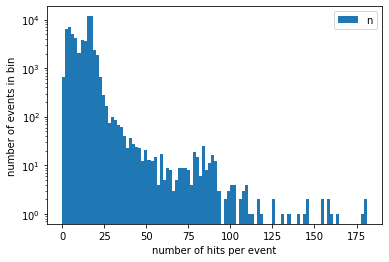

In [ ]:
plt.hist(hits_woutnoise,bins = 100,log = True)
plt.xlabel('number of hits per event')
plt.ylabel('number of events in bin')
plt.legend('n')